In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.re_referencing import rref_REST

DEBUG:root:test
DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


In [2]:
# Params load data
data_folder = "../data/"

# Params Reconstruction
reconst_threshold = None #0.2

# Params Cleaning
clean_threshold = 0.6
window_time_cleaning = 10
rref_fn = rref_REST

# Params AIS
max_lag = 20
cmi_estimator = 'JidtGaussianCMI' #'JidtKraskovCMI' 'OpenCLKraskovCMI' 'JidtGaussianCMI'
local_values = False

save_folder = os.path.join(
    "../results/", 
    f"reconstth-{reconst_threshold}_cleanth-{clean_threshold}_windowtimecleaning-{window_time_cleaning}_{rref_fn.__name__}_maxlag-{max_lag}_cmiestimator-{cmi_estimator}".replace(".", "o")
)


In [3]:
hc_filenames = list(filter(lambda x: x.startswith("h"), sorted(os.listdir(data_folder))))
sz_filenames = list(filter(lambda x: x.startswith("s"), sorted(os.listdir(data_folder))))

filenames = hc_filenames + sz_filenames
filenames

['h01.edf',
 'h02.edf',
 'h03.edf',
 'h04.edf',
 'h05.edf',
 'h06.edf',
 'h07.edf',
 'h08.edf',
 'h09.edf',
 'h10.edf',
 'h11.edf',
 'h12.edf',
 'h13.edf',
 'h14.edf',
 's01.edf',
 's02.edf',
 's03.edf',
 's04.edf',
 's05.edf',
 's06.edf',
 's07.edf',
 's08.edf',
 's09.edf',
 's10.edf',
 's11.edf',
 's12.edf',
 's13.edf',
 's14.edf']

In [4]:
ais_ch = {}
for filename in filenames:
    save_subject_folder = filename.split(".edf")[0]
    for i_channel in [16, 17, 18]:
        print(f"Loading: {filename}, channel: {i_channel}")
        save_filename = f"ais_ichannel-{i_channel}"
        load_filepath = os.path.join(save_folder, save_subject_folder, save_filename)
        npz = np.load(f"{load_filepath}.npz")
        ais = npz["ais"]
        ais_ch.setdefault(save_subject_folder, {})
        ais_ch[save_subject_folder].setdefault(f"{i_channel}", ais)


Loading: h01.edf, channel: 16
Loading: h01.edf, channel: 17
Loading: h01.edf, channel: 18
Loading: h02.edf, channel: 16
Loading: h02.edf, channel: 17
Loading: h02.edf, channel: 18
Loading: h03.edf, channel: 16
Loading: h03.edf, channel: 17
Loading: h03.edf, channel: 18
Loading: h04.edf, channel: 16
Loading: h04.edf, channel: 17
Loading: h04.edf, channel: 18
Loading: h05.edf, channel: 16
Loading: h05.edf, channel: 17
Loading: h05.edf, channel: 18
Loading: h06.edf, channel: 16
Loading: h06.edf, channel: 17
Loading: h06.edf, channel: 18
Loading: h07.edf, channel: 16
Loading: h07.edf, channel: 17
Loading: h07.edf, channel: 18
Loading: h08.edf, channel: 16
Loading: h08.edf, channel: 17
Loading: h08.edf, channel: 18
Loading: h09.edf, channel: 16
Loading: h09.edf, channel: 17
Loading: h09.edf, channel: 18
Loading: h10.edf, channel: 16
Loading: h10.edf, channel: 17
Loading: h10.edf, channel: 18
Loading: h11.edf, channel: 16
Loading: h11.edf, channel: 17
Loading: h11.edf, channel: 18
Loading: h

In [5]:
import pandas as pd

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/jarajaras/anaconda3/envs/eeg-env/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/jarajaras/anaconda3/envs/eeg-env/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


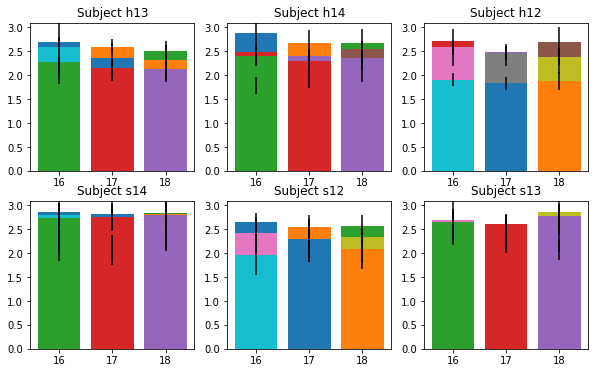

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6))
for j, (s_key, dict_values) in enumerate(ais_ch.items()):
    for i_channel, data in dict_values.items():
        k = 0 if s_key[0] == 'h' else 1
        ax[k, j%3].bar(i_channel, data.mean(), yerr=data.std())
        ax[k, j%3].set_title(f"Subject {s_key}")
        ax[k, j%3].set_ylim(0, 3.1)

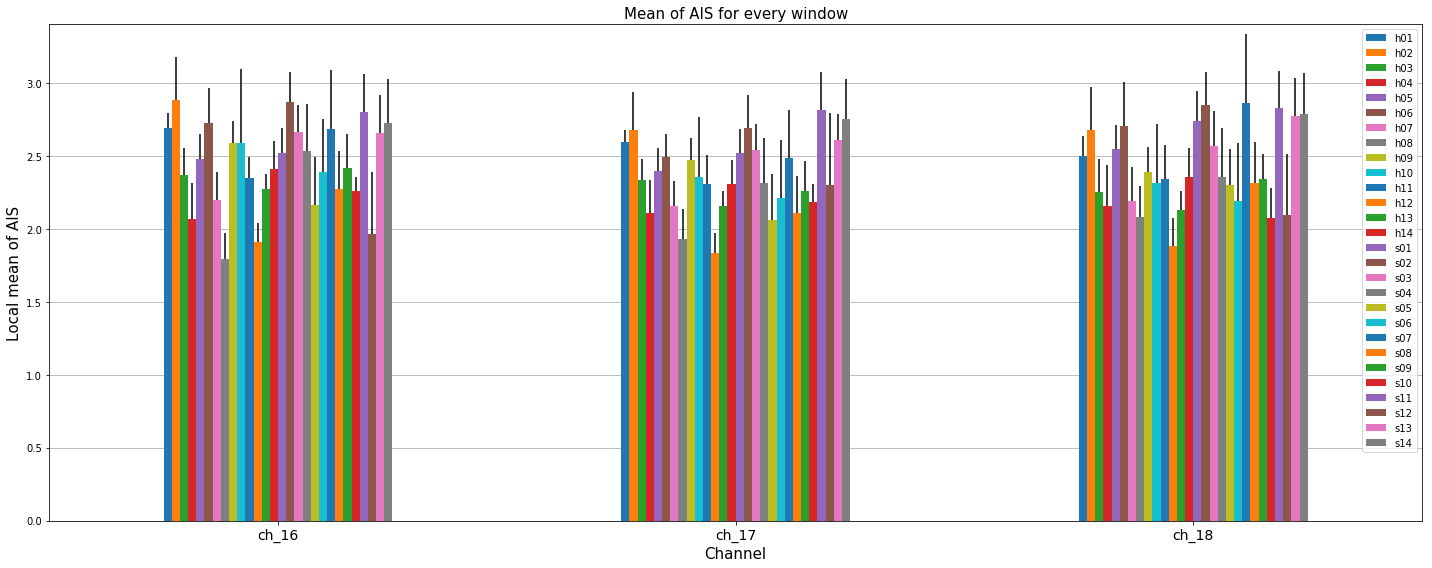

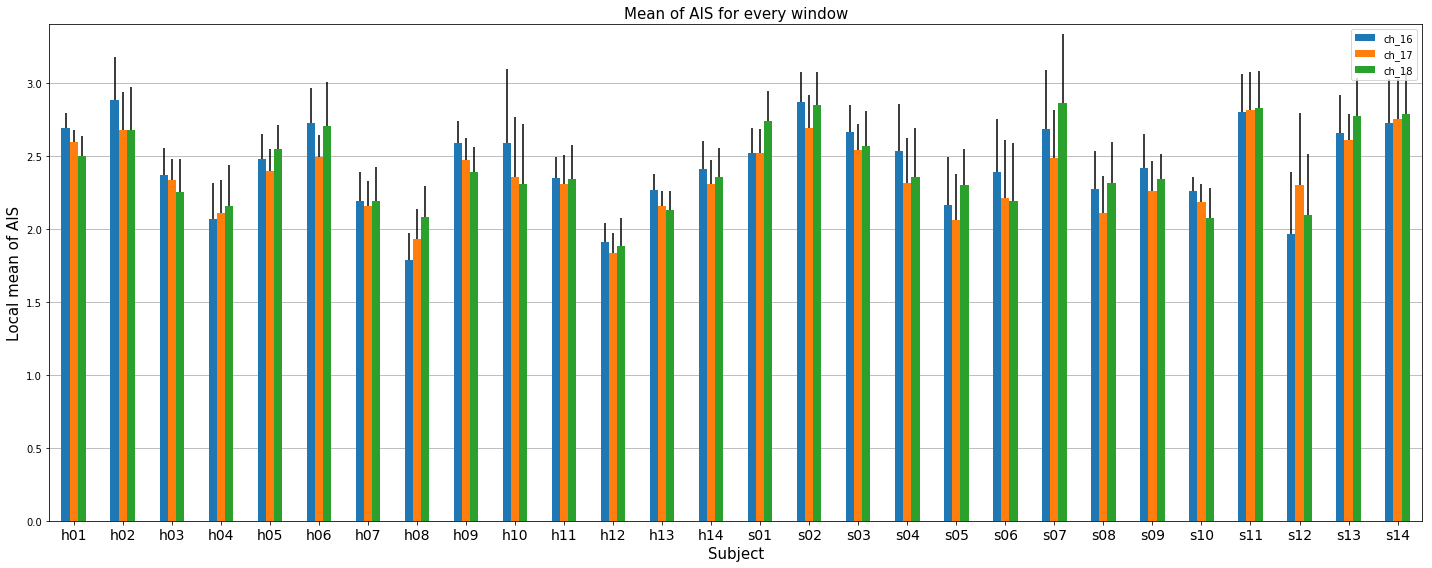

In [45]:
df = pd.DataFrame.from_dict(ais_ch)
df.index = df.index.map(lambda x: f"ch_{x}")

df_mean = pd.concat([df[col].apply(lambda row: row.mean()) for col in df.columns], axis=1)
df_std = pd.concat([df[col].apply(lambda row: row.std()) for col in df.columns], axis=1)

fig, ax = plt.subplots(figsize=(20,8))
df_mean.plot(kind="bar", yerr=df_std, ax=ax, zorder=3)
ax.set_ylabel("Local mean of AIS", fontsize=15)
ax.set_xlabel("Channel", fontsize=15)
ax.set_title("Mean of AIS for every window", fontsize=15)
plt.xticks(fontsize=14, rotation=0)
ax.grid(zorder=0, axis="y")
ax.set_ylim(0, 3.4)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(20,8))
df_mean.T.plot(kind="bar", yerr=df_std.T, ax=ax, zorder=3)
ax.set_ylabel("Local mean of AIS", fontsize=15)
ax.set_xlabel("Subject", fontsize=15)
ax.set_title("Mean of AIS for every window", fontsize=15)
plt.xticks(fontsize=14, rotation=0)
ax.set_ylim(0, 3.4)
ax.grid(zorder=0, axis="y")
plt.tight_layout()
plt.show()
    

In [36]:
df_mean.T.loc[list(filter(lambda x: x.startswith("h"), df_mean.columns))].describe()

,ch_16,ch_17,ch_18
count,14.000000,14.000000,14.000000
mean,2.378938,2.294888,2.321657
std,0.314029,0.238246,0.231364
min,1.789485,1.832134,1.884255
25%,2.212632,2.157986,2.162375
50%,2.390959,2.321971,2.323935
75%,2.585602,2.453360,2.471308
max,2.885094,2.673493,2.702547


In [38]:
df_mean.T.loc[list(filter(lambda x: x.startswith("s"), df_mean.columns))].describe()

,ch_16,ch_17,ch_18
count,14.000000,14.000000,14.000000
mean,2.493402,2.417200,2.505186
std,0.262662,0.244640,0.295431
min,1.962836,2.060461,2.073591
25%,2.302712,2.223589,2.305921
50%,2.525814,2.398814,2.460512
75%,2.678982,2.590967,2.783169
max,2.870157,2.815200,2.862492


In [41]:
df_std.T.loc[list(filter(lambda x: x.startswith("h"), df_std.columns))].describe()

,ch_16,ch_17,ch_18
count,14.000000,14.000000,14.000000
mean,0.203322,0.181598,0.228169
std,0.101857,0.080729,0.076303
min,0.100644,0.081533,0.130236
25%,0.147133,0.144066,0.173636
50%,0.181031,0.158263,0.223154
75%,0.229484,0.198472,0.274195
max,0.505681,0.411418,0.409475


In [42]:
df_std.T.loc[list(filter(lambda x: x.startswith("s"), df_std.columns))].describe()

,ch_16,ch_17,ch_18
count,14.000000,14.000000,14.000000
mean,0.272469,0.263233,0.285148
std,0.092709,0.099604,0.088370
min,0.097263,0.118576,0.166548
25%,0.209331,0.185364,0.229223
50%,0.261547,0.254843,0.256620
75%,0.330463,0.311558,0.322960
max,0.425230,0.492577,0.469686
